In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import scipy.io
from scipy.integrate import odeint
from mpl_toolkits import mplot3d

$$ \tau\frac{du}{dt} = -u + \theta(W_{uI}I - W_{uv}v + \eta_u) $$
$$ \tau\frac{dv}{dt} = -v + \theta(W_{vI}I - W_{vu}v + \eta_v) $$
$$ \tau\frac{dy}{dt} = -y + W_{yu}u - W_{yv}v + \eta_y $$

In [2]:
def sigmoid(x):
    '''Activation function'''
    return 1 / (1 + np.exp(-x))

## system (odeint)

In [3]:
def network(state_init, t, I, params):
    # Unpack parameters of the simulation
    Wut = params['Wut']
    Wuv = params['Wut']
    Wvt = params['Wut']
    Wvu = params['Wut']
    dt = params['dt']
    tau = params['tau']
    th = params['th'] #The target (threshold) value of y
    sigma = params['sigma']
    
    u, v, y = state_init
    
    reset = 0

    dudt = (-u + sigmoid(Wut * I - Wuv * v - 50 * reset)) / tau *dt
    dvdt = (-v + sigmoid(Wvt * I - Wvu * u + 50 * reset)) / tau *dt
    dydt = (-y + u - v) / tau * dt

    return [dudt, dvdt, dydt]

In [4]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 1,
              'tau': 100,
              'th': 0.7,
              'sigma': 0.01,}

In [5]:
I1=0.75
I2=0.78

state_init = [0.87,0.25, 0.5] #u, v, y
dt = PARAMS_DICT['dt']
T = 2000
t = np.arange(0,T,dt)

s1 = odeint(network, state_init, t, args=(I1, PARAMS_DICT))
s2 = odeint(network, state_init, t, args=(I2, PARAMS_DICT))

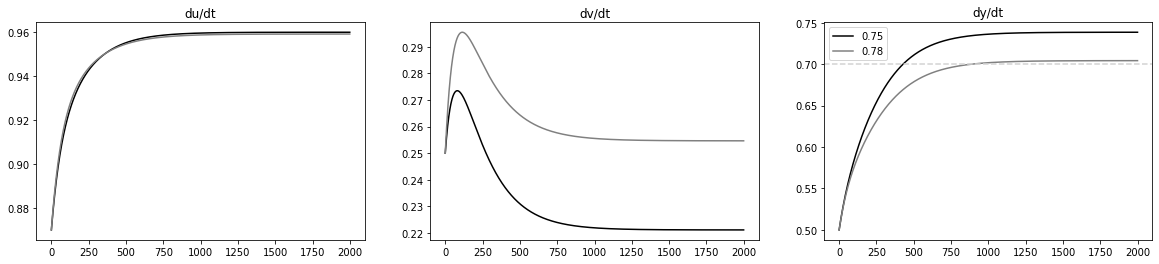

In [6]:
fig, ax = plt. subplots(1,3, figsize=(20,4))
ax[0].plot(t, s1[:,0], 'k', label=r'$du/dt$')
ax[0].plot(t, s2[:,0], 'grey', label=r'$du/dt$')
ax[0].set_title('du/dt')
ax[1].plot(t, s1[:,1], 'k', label = r'$dv/dt$')
ax[1].plot(t, s2[:,1], 'grey', label = r'$dv/dt$')
ax[1].set_title('dv/dt')
ax[2].plot(t, s1[:,2], 'k', label = I1)
ax[2].plot(t, s2[:,2], 'grey', label = I2)
ax[2].axhline(0.7, linestyle='--', color='lightgray')
ax[2].set_title('dy/dt')
ax[2].legend()

In [23]:
import matplotlib as mpl
#mpl.style.use('jet')
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler('jet')
jet = cm = plt.get_cmap('jet') 
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

In [53]:

from matplotlib import rc
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'weight' : 'bold',
        'size'   : 11}

mpl.rc('font', **font)

In [54]:
jet = cm = plt.get_cmap('jet') 
cNorm  = mpl.colors.Normalize(vmin=0, vmax=1.5)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)

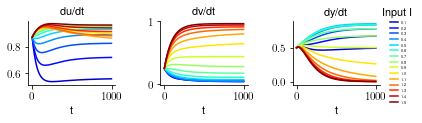

In [64]:
state_init = [0.87,0.25, 0.5] #u, v, y
dt = PARAMS_DICT['dt']
T = 1000
t = np.arange(0,T,dt)

fig, ax = plt. subplots(1,3, figsize=(6,2))
ax[0].set_title('du/dt', fontdict=font)
ax[1].set_title('dv/dt', fontdict=font)
ax[2].set_title('dy/dt', fontdict=font)
#ax[2].axhline(0.7, linestyle='--', color='lightgray')

for i in np.arange(0.1,1.6,0.1):
    c = scalarMap.to_rgba(i)
    s1 = odeint(network, state_init, t, args=(i, PARAMS_DICT))
    ax[0].plot(t, s1[:,0], color=c)
    ax[1].plot(t, s1[:,1],  color=c)
    ax[2].plot(t, s1[:,2],  color=c, label = str(i.round(2)))
ax[2].legend(bbox_to_anchor=(1, 1.25), title='Input I', frameon=False,  prop={'size': 4})

for i in [0,1,2]:
    # Hide the right and top spines
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[i].yaxis.set_ticks_position('left')
    ax[i].xaxis.set_ticks_position('bottom')
    
    ax[i].set_xlabel('t', fontdict=font)

plt.tight_layout()
plt.savefig('../report/figures/dynamicsI.svg', dpi=500)

## Different inputs with reset

In [3]:
def euler(func, y0, times, I, params): 
    dt = params['dt'] #time steps
    th = params['th'] #target threshold
    y = np.zeros([times.size, 3])  #array to save u,v,y
    y[0] = y0 #initial states
    reset = 0
    reset_list = []
    
    for i, t in enumerate(times[:-1]):
        y[i+1] = y[i] + np.array(func(y[i], t, I, params, reset)) * dt
        reset = float(y[i+1, 2] >= th) #reset 1 if y over th
        reset_list.append(reset)
        
    return y, reset_list

In [4]:
def network(h, t, I, params, reset):
    u, v, y = h
    Wut = params['Wut']
    Wuv = params['Wut']
    Wvt = params['Wut']
    Wvu = params['Wut']
    dt = params['dt']
    tau = params['tau']
    sigma = params['sigma']
    
    dudt = (-u + sigmoid(Wut * I - Wuv * v - 50 * reset + np.random.randn(1)[0] * sigma)) / tau
    dvdt = (-v + sigmoid(Wvt * I - Wvu * u + 50 * reset + np.random.randn(1)[0] * sigma)) / tau
    dydt = (-y + u - v + np.random.randn(1)[0] * sigma) / tau * dt
    
    return [dudt, dvdt, dydt]

In [5]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 1,
              'tau': 100,
              'th': 0.7,
              'sigma': 0.01}

In [6]:
dt = PARAMS_DICT['dt']
I1, I2 = 0.75, 0.78
state_init = [0.87,0.25, 0.5]
time_points = np.arange(0, 3000, dt)
s1, res1 = euler(network, state_init, time_points, I1, PARAMS_DICT)
s2, res2 = euler(network, state_init, time_points, I2, PARAMS_DICT)

where1 = np.where(np.array(res1)==1)[0]
where2 = np.where(np.array(res2)==1)[0]

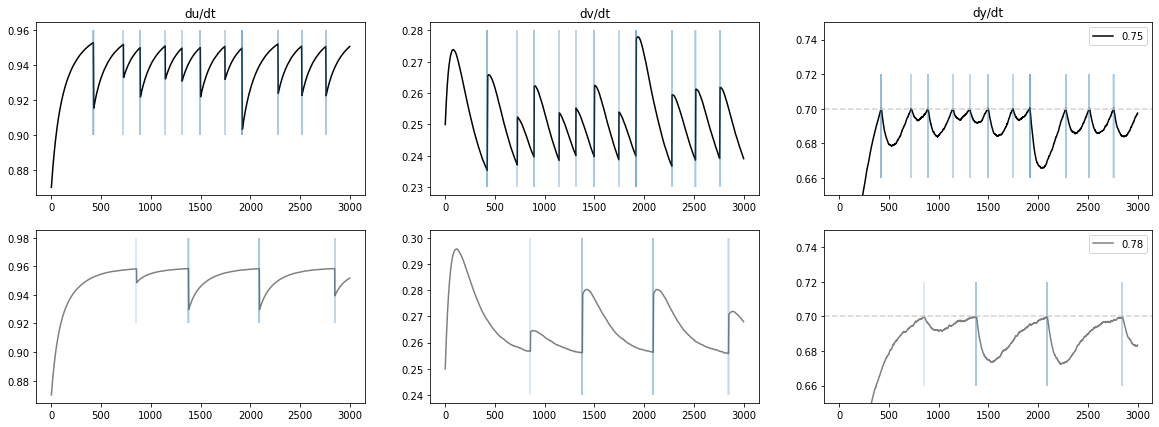

In [16]:
fig, ax = plt. subplots(2,3, figsize=(20,7))
ax.flatten()[0].plot(time_points, s1[:,0], 'k', label=r'$du/dt$')
ax.flatten()[3].plot(time_points, s2[:,0], 'grey', label=r'$du/dt$')
ax.flatten()[0].vlines(where1, 0.9, 0.96, alpha=0.2)
ax.flatten()[3].vlines(where2, 0.92, 0.98, alpha=0.2)
ax.flatten()[0].set_title('du/dt')

ax.flatten()[1].plot(time_points, s1[:,1], 'k', label = r'$dv/dt$')
ax.flatten()[4].plot(time_points, s2[:,1], 'grey', label = r'$dv/dt$')
ax.flatten()[1].set_title('dv/dt')
ax.flatten()[1].vlines(where1, 0.23, 0.28, alpha=0.2)
ax.flatten()[4].vlines(where2, 0.24, 0.3, alpha=0.2)

ax.flatten()[2].plot(time_points, s1[:,2], 'k', label = I1)
ax.flatten()[5].plot(time_points, s2[:,2], 'grey', label = I2)
ax.flatten()[2].vlines(where1, 0.66, 0.72, alpha=0.2)
ax.flatten()[5].vlines(where2, 0.66, 0.72, alpha=0.2)
ax.flatten()[2].set_title('dy/dt')

ax.flatten()[2].axhline(0.7, linestyle='--', color='lightgray')
ax.flatten()[5].axhline(0.7, linestyle='--', color='lightgray')
ax.flatten()[2].set_ylim(0.65, 0.75)
ax.flatten()[5].set_ylim(0.65, 0.75)

ax.flatten()[2].legend()
ax.flatten()[5].legend()

## SAM: adapting I according to duration

$$ \tau \frac{dI}{dt} = sK(y-y_0) $$

In [121]:
def euler_I(func, y0, niter, params, K, reset): 
    dt = params['dt']
    th = params['th']
    
    y = np.zeros([niter+1, 4])  
    y[0] = y0
    reset_lst = []
    
    for i, t in enumerate(range(niter)):
        y[i+1] = y[i] + np.array(func(y[i], t, params, reset, K)) * dt
        reset_lst.append(reset)

    return y[1:], reset_lst

In [122]:
def network_I(h, t, params, reset, K):
    u, v, y, I = h
    Wut = params['Wut']
    Wuv = params['Wut']
    Wvt = params['Wut']
    Wvu = params['Wut']
    dt = params['dt']
    tau = params['tau']
    sigma = params['sigma']
    th = params['th']
    
    dIdt = (reset * K * (y - th)) / tau
    dudt = (-u + sigmoid(Wut * I - Wuv * v - 50 * reset + np.random.randn(1)[0] * sigma)) / tau
    dvdt = (-v + sigmoid(Wvt * I - Wvu * u + 50 * reset + np.random.randn(1)[0] * sigma)) / tau
    dydt = (-y + u - v + np.random.randn(1)[0] * sigma) / tau
    return [dudt, dvdt, dydt, dIdt]

In [123]:
def simulate_trial(PARAMS_DICT, duration, nstages, K, initI):
    dt = PARAMS_DICT['dt']
    first_duration = PARAMS_DICT['first_duration']
    uinit = PARAMS_DICT['uinit']
    vinit = PARAMS_DICT['vinit']
    yinit = PARAMS_DICT['yinit']
    
    state_init = [uinit, vinit, yinit, initI]
    
    nbin = int(duration / dt) #400 ms
    nbinfirst = int(first_duration / dt) #750 ms
    
    reset=0.0
    s, r = euler_I(network_I, state_init, nbinfirst, PARAMS_DICT, 0, reset)
    print('first round', reset)
    
    for k in range((nstages - 2) * 2):
        state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
        reset = (reset + 1.0)%2
        print('stages', reset)
        
        if reset == 0:
            s2, r2 = euler_I(network_I, state_init, nbin, PARAMS_DICT, K, reset)
        
        else: #updating I every stage (1 bin)
            if k == 0: # No update of I for first flash
                s2, r2 = euler_I(network_I, state_init, 1, PARAMS_DICT, 0, reset)  
            else: #update I in one bin
                s2, r2 = euler_I(network_I, state_init, 1, PARAMS_DICT, K, reset)
        
        s = np.concatenate((s,s2))
        r.extend(r2)
        
        
    #last run behavior 
    state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
    reset = (reset + 1.0)%2

    if nstages == 2:
        Keff = 0
    else:
        Keff = K

    #last update    
    s2, r2 = euler_I(network_I, state_init, 1, PARAMS_DICT, Keff, reset)
    s = np.concatenate((s,s2))
    r.extend(r2)

    #behavior
    state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
    reset = (reset + 1.0)%2
    s2, r2 = euler_I(network_I, state_init, nbin*2, PARAMS_DICT, K, reset)
    r2[nbin] = 1 #where th sould be reached 
    s = np.concatenate((s,s2))
    r.extend(r2)
        
    return s, r

In [124]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.7,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 750, 
              'sigma': 0.01}

In [125]:
duration = 400
nstages = 4
K = 5.0
dt = PARAMS_DICT['dt']
initI = 0.77

simu, res = simulate_trial(PARAMS_DICT, duration, nstages, K, initI)

first round 0.0
stages 1.0
stages 0.0
stages 1.0
stages 0.0


In [128]:
where = np.where(np.array(res)==1)[0]-1

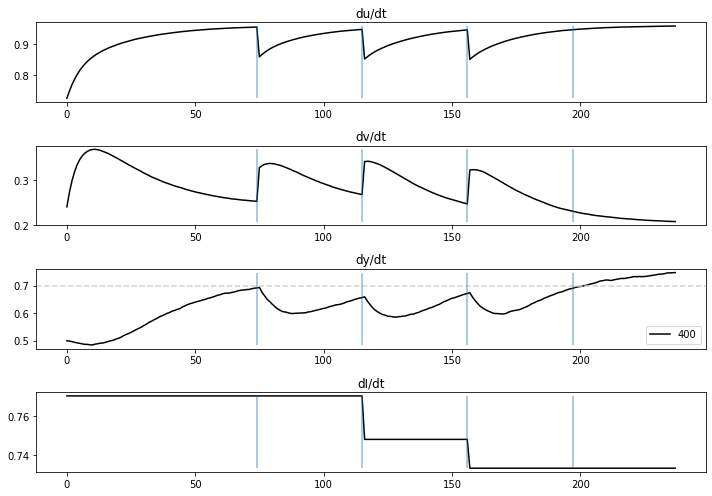

In [130]:
fig, ax = plt. subplots(4,1, figsize=(10,7))
ax[0].plot(simu[:,0], 'k', label=r'$du/dt$')
ax[0].vlines(where, np.min(np.array(simu[:,0])), np.max(np.array(simu[:,0])), alpha=0.5)
ax[0].set_title('du/dt')
ax[1].plot(simu[:,1], 'k', label = r'$dv/dt$')
ax[1].vlines(where, np.min(np.array(simu[:,1])), np.max(np.array(simu[:,1])), alpha=0.5)
ax[1].set_title('dv/dt')
ax[2].plot(simu[:,2], 'k', label = duration)
ax[2].axhline(0.7, linestyle='--', color='lightgray')
ax[2].vlines(where, np.min(np.array(simu[:,2])), np.max(np.array(simu[:,2])), alpha=0.5)
ax[2].set_title('dy/dt')
ax[2].legend()
ax[3].plot(simu[:,3], 'k')
ax[3].vlines(where, np.min(np.array(simu[:,3])), np.max(np.array(simu[:,3])), alpha=0.5)
ax[3].set_title('dI/dt')


plt.tight_layout()

### SAM (paper method)

In [10]:
def network_I2(state_init, PARAMS_DICT, reset, K, niter):
    
    u, v, y, I = state_init
    
    Wut = PARAMS_DICT['Wut']
    Wuv = PARAMS_DICT['Wuv']
    Wvt = PARAMS_DICT['Wvt']
    Wvu = PARAMS_DICT['Wvu']
    dt = PARAMS_DICT['dt']
    tau = PARAMS_DICT['tau']
    sigma = PARAMS_DICT['sigma']
    th = PARAMS_DICT['th']
    IF = PARAMS_DICT['IF']
    
    r = []
    s = np.zeros([niter,4])  
    
    for i in range(niter):
        I += (reset * K * (y - th)) / tau * dt
        u += (-u + sigmoid(Wut * I - Wuv * v - IF * reset + np.random.randn(1)[0] * sigma)) / tau * dt
        v += (-v + sigmoid(Wvt * I - Wvu * u + IF * reset + np.random.randn(1)[0] * sigma)) / tau * dt
        y += (-y + u - v + np.random.randn(1)[0] * sigma) / tau * dt
        
        s[i] = [u, v, y, I]
        r.append(reset)
        
    return s, r

In [11]:
def simulate_trial2(PARAMS_DICT, duration, nstages, K, initI):
    dt = PARAMS_DICT['dt']
    first_duration = PARAMS_DICT['first_duration']
    uinit = PARAMS_DICT['uinit']
    vinit = PARAMS_DICT['vinit']
    yinit = PARAMS_DICT['yinit']
    
    state_init = [uinit, vinit, yinit, initI]
    
    nbin = int(duration / dt) #400 ms
    nbinfirst = int(first_duration / dt) #750 ms
    
    reset=0.0
    s, r = network_I2(state_init, PARAMS_DICT, reset, 0, nbinfirst)
    
    for k in range((nstages - 2) * 2):
        state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
        reset = (reset + 1.0)%2 #switch state 
        print('stages', reset)
        
        if reset == 0: #between flashes
            s2, r2 = network_I2(state_init, PARAMS_DICT, reset, K, nbin)
        
        else: #flash: updating I (1 bin)
            if k == 0: # No update of I for first flash
                s2, r2 = network_I2(state_init, PARAMS_DICT, reset, 0, 1)  
            else: #update I in one bin
                s2, r2 = network_I2(state_init, PARAMS_DICT, reset, K, 1)
        
        s = np.concatenate((s,s2))
        r.extend(r2)
        
        
    #last run behavior 
    state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
    reset = (reset + 1.0)%2

    if nstages == 2:
        Keff = 0
    else:
        Keff = K

    #last update    
    s2, r2 = network_I2(state_init, PARAMS_DICT, reset, Keff, 1)
    s = np.concatenate((s,s2))
    r.extend(r2)

    #behavior
    state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
    reset = (reset + 1.0)%2
    s2, r2 = network_I2(state_init, PARAMS_DICT, reset, K, nbin*2)
    r2[nbin] = 1 #where th sould be reached 
    s = np.concatenate((s,s2))
    r.extend(r2)
    
    return s, r

In [12]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.7,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 1000, 
              'sigma': 0.01}

In [25]:
duration =700
nstages = 4
K = 5.0
dt = PARAMS_DICT['dt']
initI = 0.77

simu3, res = simulate_trial2(PARAMS_DICT, duration, nstages, K, initI)
where3 = np.where(np.array(res)==1)[0] -1

stages 1.0
stages 0.0
stages 1.0
stages 0.0


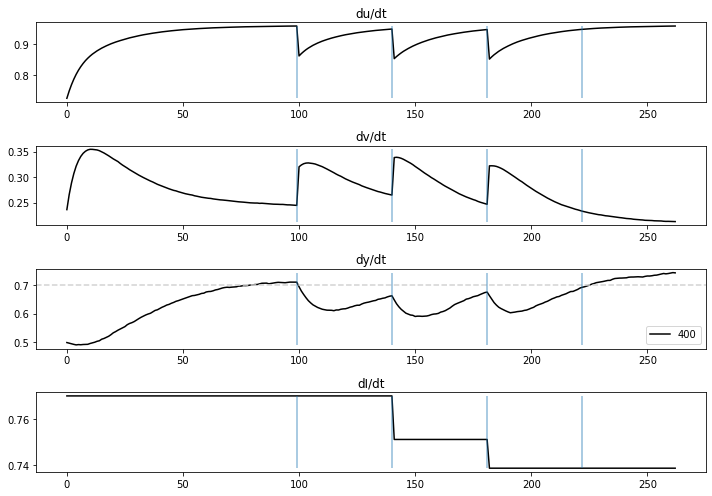

In [22]:
fig, ax = plt. subplots(4,1, figsize=(10,7))
ax[0].plot(simu[:,0], 'k', label=r'$du/dt$')
ax[0].vlines(where, np.min(np.array(simu[:,0])), np.max(np.array(simu[:,0])), alpha=0.5)
ax[0].set_title('du/dt')
ax[1].plot(simu[:,1], 'k', label = r'$dv/dt$')
ax[1].vlines(where, np.min(np.array(simu[:,1])), np.max(np.array(simu[:,1])), alpha=0.5)
ax[1].set_title('dv/dt')
ax[2].plot(simu[:,2], 'k', label = duration)
ax[2].axhline(0.7, linestyle='--', color='lightgray')
ax[2].vlines(where, np.min(np.array(simu[:,2])), np.max(np.array(simu[:,2])), alpha=0.5)
ax[2].set_title('dy/dt')
ax[2].legend()
ax[3].plot(simu[:,3], 'k')
ax[3].vlines(where, np.min(np.array(simu[:,3])), np.max(np.array(simu[:,3])), alpha=0.5)
ax[3].set_title('dI/dt')

plt.tight_layout()

# PCA on one trial

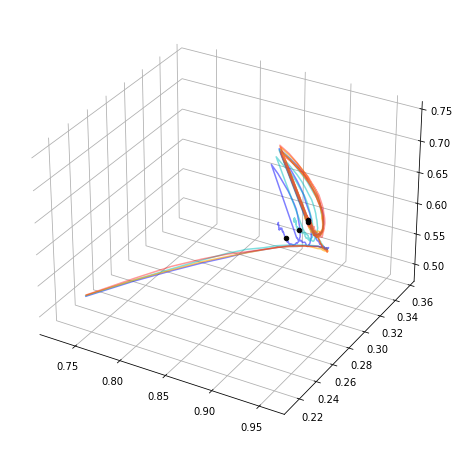

In [26]:

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot3D(simu[:,0], simu[:,1], simu[:,2], 'blue', alpha=0.5) #400
ax.plot3D(simu4[:,0], simu4[:,1], simu4[:,2], 'c', alpha=0.5) #500
ax.plot3D(simu2[:,0], simu2[:,1], simu2[:,2], 'orange', alpha=0.6) #600
ax.plot3D(simu3[:,0], simu3[:,1], simu3[:,2], 'red', alpha=0.4) #700

ax.scatter3D(simu[where[-1],0], simu[where[-1],1], simu[where[-1],2], c='black')
ax.scatter3D(simu4[where4[-1],0], simu4[where4[-1],1], simu4[where4[-1],2], c='black')
ax.scatter3D(simu2[where2[-1],0], simu2[where2[-1],1], simu2[where2[-1],2], c='black')
ax.scatter3D(simu3[where3[-1],0], simu3[where3[-1],1], simu3[where3[-1],2], c='black')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

(0.45, 0.65)

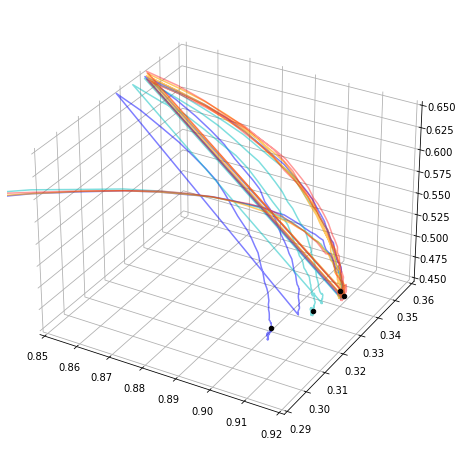

In [27]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot3D(simu[:,0], simu[:,1], simu[:,2], 'blue', alpha=0.5) #400
ax.plot3D(simu4[:,0], simu4[:,1], simu4[:,2], 'c', alpha=0.5) #500
ax.plot3D(simu2[:,0], simu2[:,1], simu2[:,2], 'orange', alpha=0.6) #600
ax.plot3D(simu3[:,0], simu3[:,1], simu3[:,2], 'red', alpha=0.4) #800

ax.scatter3D(simu[where[-1],0], simu[where[-1],1], simu[where[-1],2], c='black')
ax.scatter3D(simu4[where4[-1],0], simu4[where4[-1],1], simu4[where4[-1],2], c='black')
ax.scatter3D(simu2[where2[-1],0], simu2[where2[-1],1], simu2[where2[-1],2], c='black')
ax.scatter3D(simu3[where3[-1],0], simu3[where3[-1],1], simu3[where3[-1],2], c='black')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xlim(0.85, 0.92)
ax.set_ylim(0.29, 0.36)
ax.set_zlim(0.45, 0.65)

In [52]:
75+40+80

195

In [38]:
i1 = simu[:,:3].shape[0]
i2 = simu4[:,:3].shape[0]
i3 = simu2[:,:3].shape[0]
i4 = simu3[:,:3].shape[0]
print(i1,i2,i3,i4)
print(i1+i2+i3+i4)

263 303 343 383
1292


In [31]:
simu_all = np.concatenate((simu[:,:3],simu4[:,:3], simu2[:,:3], simu3[:,:3]))
simu_all.shape

(1292, 3)

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
Z = pca.fit_transform(simu_all)

In [46]:
s1 = Z[0:i1]
s2 = Z[i1:i1+i2]
s3 = Z[i1+i2:i1+i2+i3]
s4 = Z[i1+i2+i3:i1+i2+i3+i4]

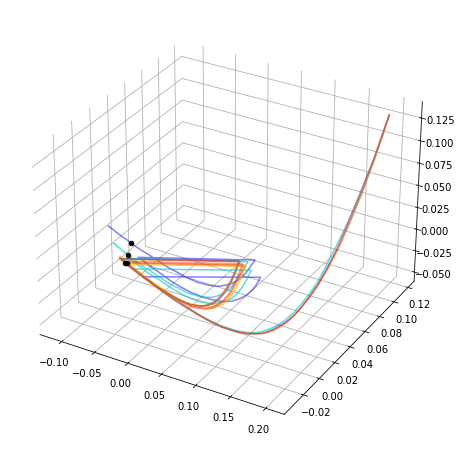

In [51]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot3D(s1[:,0], s1[:,1], s1[:,2], 'blue', alpha=0.5)
ax.plot3D(s2[:,0], s2[:,1], s2[:,2], 'c', alpha=0.6)
ax.plot3D(s3[:,0], s3[:,1], s3[:,2], 'orange', alpha=0.6)
ax.plot3D(s4[:,0], s4[:,1], s4[:,2], 'red', alpha=0.4)

ax.scatter3D(s1[where[-1],0], s1[where[-1],1], s1[where[-1],2], c='black')
ax.scatter3D(s2[where4[-1],0], s2[where4[-1],1], s2[where4[-1],2], c='black')
ax.scatter3D(s3[where2[-1],0], s3[where2[-1],1], s3[where2[-1],2], c='black')
ax.scatter3D(s4[where3[-1],0], s4[where3[-1],1], s4[where3[-1],2], c='black')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

#ax.set_xlim(-0.1, 0.1)

## 1,2-Go Task with trials

In [199]:
a = 5
b = a
a += 1
b

5

In [248]:
a = np.array([5])
b = a#.copy()
a += 1
b

array([6])

In [2]:
def network(state_init, PARAMS_DICT, reset, K, niter):
    
    u, v, y, I = state_init.copy()
    
    Wut = PARAMS_DICT['Wut']
    Wuv = PARAMS_DICT['Wuv']
    Wvt = PARAMS_DICT['Wvt']
    Wvu = PARAMS_DICT['Wvu']
    dt = PARAMS_DICT['dt']
    tau = PARAMS_DICT['tau']
    sigma = PARAMS_DICT['sigma']
    th = PARAMS_DICT['th']
    IF = PARAMS_DICT['IF']
    ntrials = PARAMS_DICT['ntrials']
    
    r = []
    s = np.zeros([niter,4, ntrials])  
    #s = np.zeros([niter,4, 1])  
    #s = np.zeros([niter,4])  
    
    for i in range(niter):
        I += (reset * K * (y - th)) / tau * dt
        u += (-u + sigmoid(Wut * I - Wuv * v - IF * reset + np.random.randn(ntrials).squeeze() * sigma)) / tau * dt
        v += (-v + sigmoid(Wvt * I - Wvu * u + IF * reset + np.random.randn(ntrials).squeeze() * sigma)) / tau * dt
        y += (-y + u - v + np.random.randn(ntrials).squeeze() * sigma) / tau * dt
        
        s[i] = [u.copy(), v.copy(), y.copy(), I.copy()]
        r.append(reset)
        
    return s, r

In [3]:
def start_network(simulation, reset_lst, PARAMS_DICT, reset, K, nbin, behavior=False):
    state_init = simulation[-1]
    print(state_init.shape)
    s2, r2 = network(state_init, PARAMS_DICT, reset, K, nbin)
    
    print('s2', np.array(s2).shape)
    
    if behavior:
        production = []
        for i in range(PARAMS_DICT['ntrials']):
            p = np.where(s2[:,2,i]>=PARAMS_DICT['th'])[0][0]
            production.append(p)
        simulation = np.concatenate((simulation,s2))
        reset_lst.extend(r2)
        return simulation, reset_lst, production
    
    simulation = np.concatenate((simulation,s2))
    print('simulation', np.array(simulation).shape)
    reset_lst.extend(r2)
    return simulation, reset_lst

In [4]:
def simulate_onetwogo(PARAMS_DICT, duration, K, initI):
    dt = PARAMS_DICT['dt']
    first_duration = PARAMS_DICT['first_duration']
    uinit = PARAMS_DICT['uinit']
    vinit = PARAMS_DICT['vinit']
    yinit = PARAMS_DICT['yinit']
    ntrials = PARAMS_DICT['ntrials']
    
    state_init = [np.ones(ntrials) * uinit, 
                  np.ones(ntrials) * vinit,
                  np.ones(ntrials) * yinit,
                  np.ones(ntrials) * initI]
    #state_init = np.array([[uinit],  [vinit],    [yinit],    [initI]])
    #state_init = np.array([uinit,  vinit,    yinit,    initI])
    print('initial', np.array(state_init).shape)
    
    nbin = int(duration / dt) #400 ms
    nbinfirst = int(first_duration / dt) #750 ms
    
    #first duration
    s, r = network(state_init, PARAMS_DICT, reset=0, K=0, niter=nbinfirst)
    
    print('s', np.array(s).shape)
    
    #first flash, no update
    s, r = start_network(s, r, PARAMS_DICT, reset=1, K=0, nbin=1)
    
    #measurement
    s, r = start_network(s, r, PARAMS_DICT, reset=0, K=K, nbin=nbin)
        
    #flash update I in one bin
    s, r = start_network(s, r, PARAMS_DICT, reset=1, K=K, nbin=1)

    #behavior
    s, r, production = start_network(s, r, PARAMS_DICT, reset=0, K=K, nbin=nbin*2, behavior=True)
    r[nbinfirst+2*nbin] = 1 #where th sould be reached
    
    return s, r, production

In [53]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.7,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 750, 
              'sigma': 0.01, 
             'ntrials':100}

In [15]:
stim = 600
K = 5.0
initI = 0.77
PARAMS_DICT['tau'] = 150
task = otg.OneTwoGo_Task(PARAMS_DICT)
simu, res, production, timeout_trials = task.simulate_parallel(stim, K, initI)
where = np.where(np.array(res)==1)[0] -1

In [18]:
where

array([ 74, 135, 194])

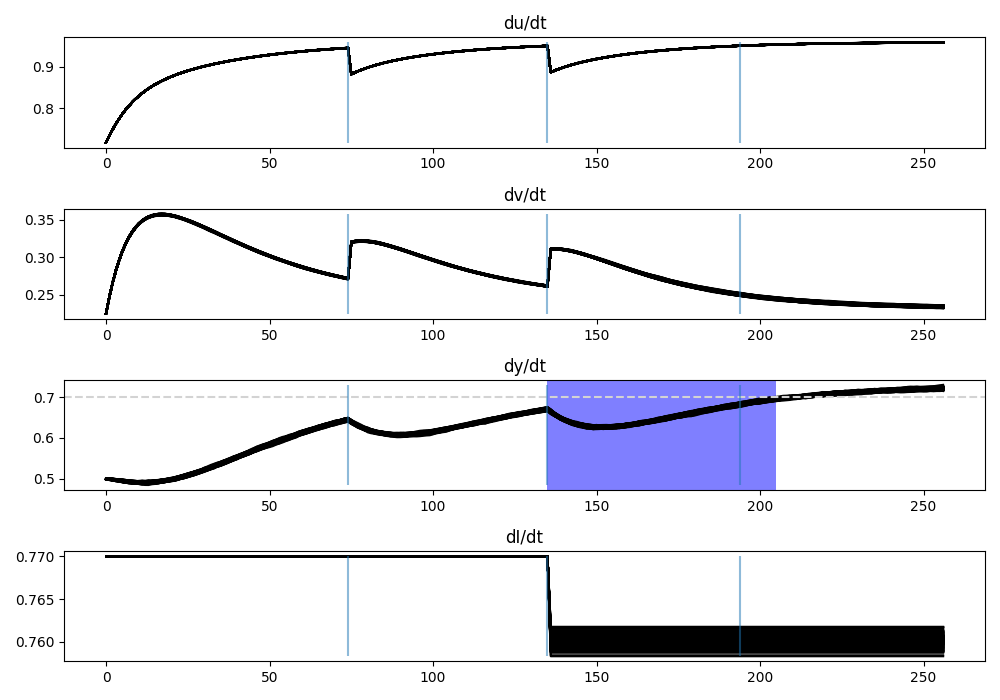

In [19]:
fig, ax = plt. subplots(4,1, figsize=(10,7))
ax[0].plot(simu[:,0], 'k', label=r'$du/dt$')
ax[0].vlines(where, np.min(np.array(simu[:,0])), np.max(np.array(simu[:,0])), alpha=0.5)
ax[0].set_title('du/dt')
ax[1].plot(simu[:,1], 'k', label = r'$dv/dt$')
ax[1].vlines(where, np.min(np.array(simu[:,1])), np.max(np.array(simu[:,1])), alpha=0.5)
ax[1].set_title('dv/dt')
ax[2].plot(simu[:,2], 'k', label = duration)
ax[2].axhline(th, linestyle='--', color='lightgray')
ax[2].vlines(where, np.min(np.array(simu[:,2])), np.max(np.array(simu[:,2])), alpha=0.5)
#ax[2].plot(production_, 'x', c='r')
ax[2].axvspan(135, 135+70, facecolor='b', alpha=0.5)
ax[2].set_title('dy/dt')
#ax[2].legend()
ax[3].plot(simu[:,3], 'k')
ax[3].vlines(where, np.min(np.array(simu[:,3])), np.max(np.array(simu[:,3])), alpha=0.5)
ax[3].set_title('dI/dt')

plt.tight_layout()

## PCA on trial mean

In [1]:
%matplotlib widget

import OneTwoGo as otg
import numpy as np
from scipy import signal
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.7,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 750, 
              'sigma': 0.01, 
             'ntrials':200}

In [35]:
dt = PARAMS_DICT['dt']
first_duration = PARAMS_DICT['first_duration']

In [48]:
def meas_prod_times(simu, prod, duration, sample):
    meas_start = int(first_duration/dt+1)
    meas_stop = int(first_duration/dt+1+duration/dt) #without flashes
    measure = simu[meas_start:meas_stop]
    measure = np.mean(measure,2)
#todo: last flash weg
    prod_lst = []
    for i,p in enumerate(prod):
        p_start=int(first_duration/dt+duration/dt+2)
        p_end=int(first_duration/dt+duration/dt+2+p)

        prod_lst.append(simu[p_start:p_end,:,i])
        #print(simu[p_start:p_end,:,i].shape)

    prod_sampled = [signal.resample(trial, sample) for trial in prod_lst]
    prod_sampled = np.array(prod_sampled)
    prod_sampled = np.mean(prod_sampled, 0)
    
    return measure, prod_sampled

In [49]:
K = 5.0
initI = 0.77
task = otg.OneTwoGo_Task(PARAMS_DICT)

simulation, reset_lst, production = task.simulate_onetwogo(400, K, initI)
where1 = np.where(np.array(reset_lst)==1)[0]-1
measure1, prod1 = meas_prod_times(simulation, production, 400, 50)

simulation, reset_lst, production = task.simulate_onetwogo(500, K, initI)
where2 = np.where(np.array(reset_lst)==1)[0]-1
measure2, prod2 = meas_prod_times(simulation, production, 500, 60)

simulation, reset_lst, production = task.simulate_onetwogo(600, K, initI)
where3 = np.where(np.array(reset_lst)==1)[0]-1
measure3, prod3 = meas_prod_times(simulation, production, 600, 70)

simulation, reset_lst, production = task.simulate_onetwogo(700, K, initI)
where4 = np.where(np.array(reset_lst)==1)[0]-1
measure4, prod4 = meas_prod_times(simulation, production, 700, 80)

simulation, reset_lst, production = task.simulate_onetwogo(800, K, initI)
where5 = np.where(np.array(reset_lst)==1)[0]-1
measure5, prod5 = meas_prod_times(simulation, production, 800, 90)

In [74]:
m1 = measure1[:,:3].shape[0]
m2 = measure2[:,:3].shape[0]
m3 = measure3[:,:3].shape[0]
m4 = measure4[:,:3].shape[0]
m5 = measure5[:,:3].shape[0]

meas_all = np.concatenate((measure1[:,:3],measure2[:,:3],measure3[:,:3],measure4[:,:3],measure5[:,:3]))
pca_m = PCA()
Z = pca_m.fit_transform(meas_all)

pca_m1 = Z[0:m1]
pca_m2 = Z[m1:m1+m2]
pca_m3 = Z[m1+m2:m1+m2+m3]
pca_m4 = Z[m1+m2+m3:m1+m2+m3+m4]
pca_m5 = Z[m1+m2+m3+m4:m1+m2+m3+m4+m5]

In [51]:
p1 = prod1[:,:3].shape[0]
p2 = prod2[:,:3].shape[0]
p3 = prod3[:,:3].shape[0]
p4 = prod4[:,:3].shape[0]
p5 = prod5[:,:3].shape[0]

prod_all = np.concatenate((prod1[:,:3],prod2[:,:3],prod3[:,:3],prod4[:,:3],prod5[:,:3]))
pca_p = PCA()
Z = pca_p.fit_transform(prod_all)

pca_p1 = Z[0:p1]
pca_p2 = Z[p1:p1+p2]
pca_p3 = Z[p1+p2:p1+p2+p3]
pca_p4 = Z[p1+p2+p3:p1+p2+p3+p4]
pca_p5 = Z[p1+p2+p3+p4:p1+p2+p3+p4+p5]

In [73]:
print(0,p1)
print(p1,p1+p2)
print(p1+p2,p1+p2+p3)
print(p1+p2+p3,p1+p2+p3+p4)
print(p1+p2+p3+p4,p1+p2+p3+p4+p5)

0 50
50 110
110 180
180 260
260 350


In [72]:
lst = [0,p1,p2,p3,p4,p5]
for i in range(6):
    print(sum(lst[:i+1]), sum(lst[:i+2]))

0 50
50 110
110 180
180 260
260 350
350 350


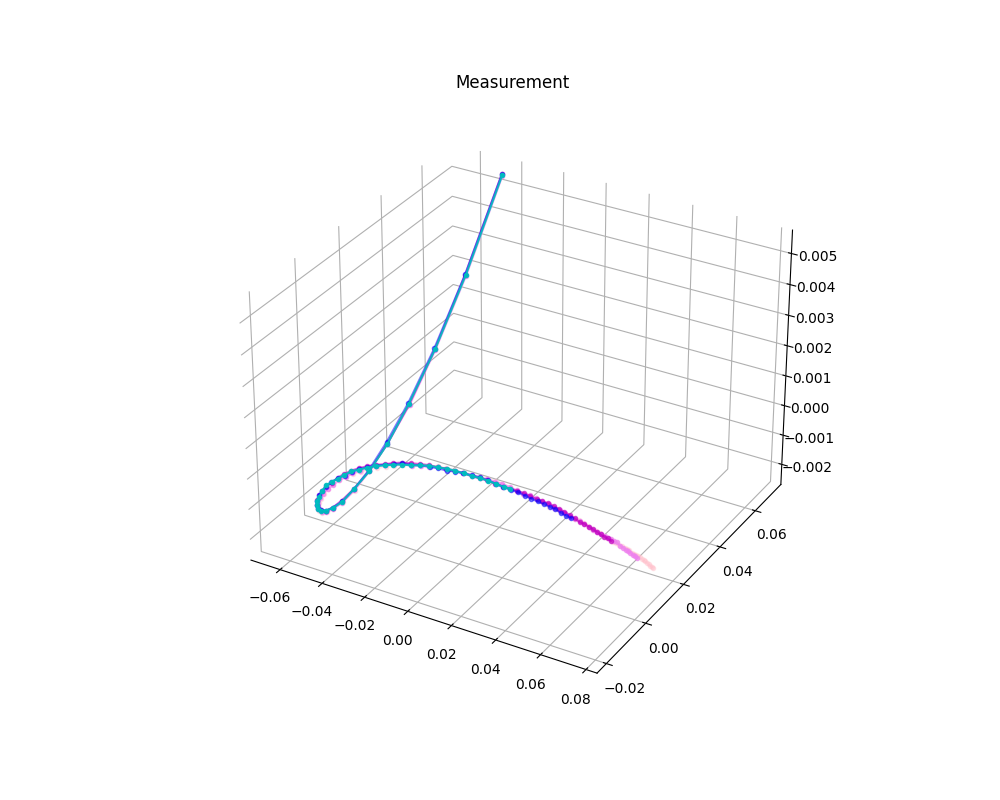

In [79]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.plot3D(pca_m5[:,0], pca_m5[:,1], pca_m5[:,2], 'pink', alpha=0.4, marker='.')
ax.plot3D(pca_m4[:,0], pca_m4[:,1], pca_m4[:,2], 'violet', alpha=0.7, marker='.')
ax.plot3D(pca_m3[:,0], pca_m3[:,1], pca_m3[:,2], 'm', alpha=0.6, marker='.')
ax.plot3D(pca_m2[:,0], pca_m2[:,1], pca_m2[:,2], 'b', alpha=0.5, marker='.')
ax.plot3D(pca_m1[:,0], pca_m1[:,1], pca_m1[:,2], 'c', alpha=0.9, marker='.')

plt.title('Measurement')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

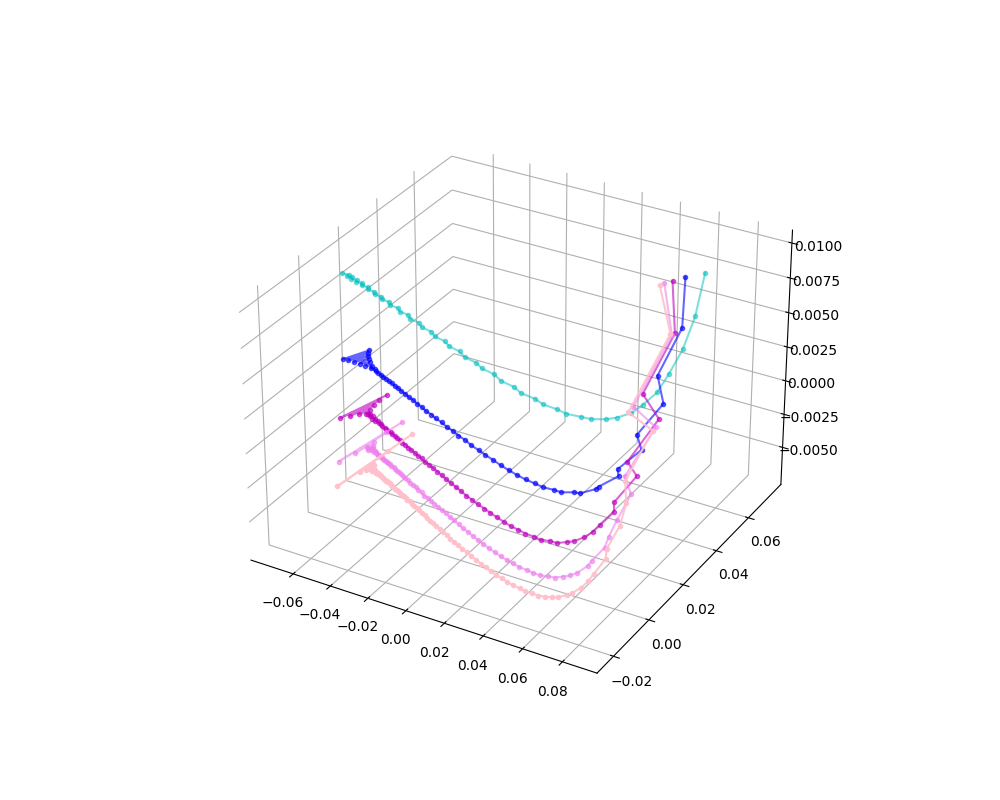

In [53]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot3D(pca_p1[:,0], pca_p1[:,1], pca_p1[:,2], 'c', alpha=0.5, marker='.')
ax.plot3D(pca_p2[:,0], pca_p2[:,1], pca_p2[:,2], 'b', alpha=0.6, marker='.')
ax.plot3D(pca_p3[:,0], pca_p3[:,1], pca_p3[:,2], 'm', alpha=0.6, marker='.')
ax.plot3D(pca_p4[:,0], pca_p4[:,1], pca_p4[:,2], 'violet', alpha=0.6, marker='.')
ax.plot3D(pca_p5[:,0], pca_p5[:,1], pca_p5[:,2], 'pink', alpha=0.9, marker='.')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

Text(0.5, 1.0, 'PC3')

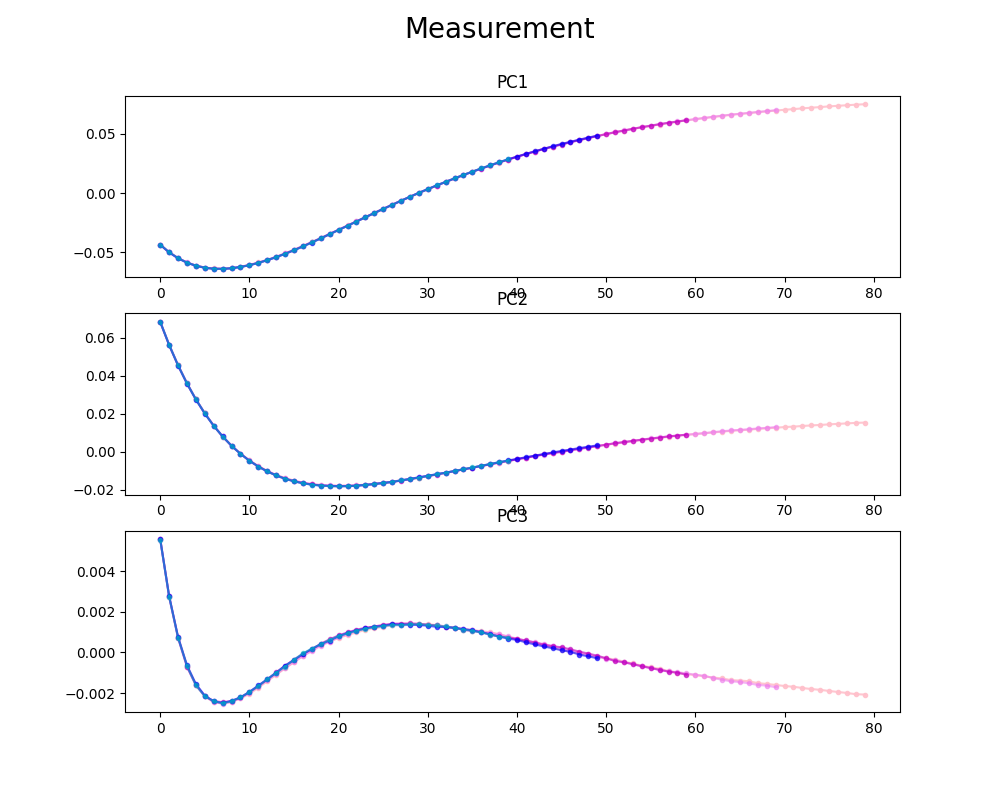

In [54]:
fig, ax = plt.subplots(3,1, figsize=(10,8))

plt.suptitle('Measurement',fontsize=20)
ax[0].plot(pca_m5[:,0], 'pink', alpha=0.9, marker='.')
ax[0].plot(pca_m4[:,0], 'violet', alpha=0.6, marker='.')
ax[0].plot(pca_m3[:,0], 'm', alpha=0.6, marker='.')
ax[0].plot(pca_m2[:,0],  'b', alpha=0.6, marker='.')
ax[0].plot(pca_m1[:,0], 'c', alpha=0.5, marker='.')
ax[0].set_title('PC1')

ax[1].plot(pca_m5[:,1], 'pink', alpha=0.9, marker='.')
ax[1].plot(pca_m4[:,1], 'violet', alpha=0.6, marker='.')
ax[1].plot(pca_m3[:,1], 'm', alpha=0.6, marker='.')
ax[1].plot(pca_m2[:,1],  'b', alpha=0.6, marker='.')
ax[1].plot(pca_m1[:,1], 'c', alpha=0.5, marker='.')
ax[1].set_title('PC2')

ax[2].plot(pca_m5[:,2], 'pink', alpha=0.9, marker='.')
ax[2].plot(pca_m4[:,2], 'violet', alpha=0.6, marker='.')
ax[2].plot(pca_m3[:,2], 'm', alpha=0.6, marker='.')
ax[2].plot(pca_m2[:,2],  'b', alpha=0.6, marker='.')
ax[2].plot(pca_m1[:,2], 'c', alpha=0.5, marker='.')
ax[2].set_title('PC3')

Text(0.5, 1.0, 'PC3')

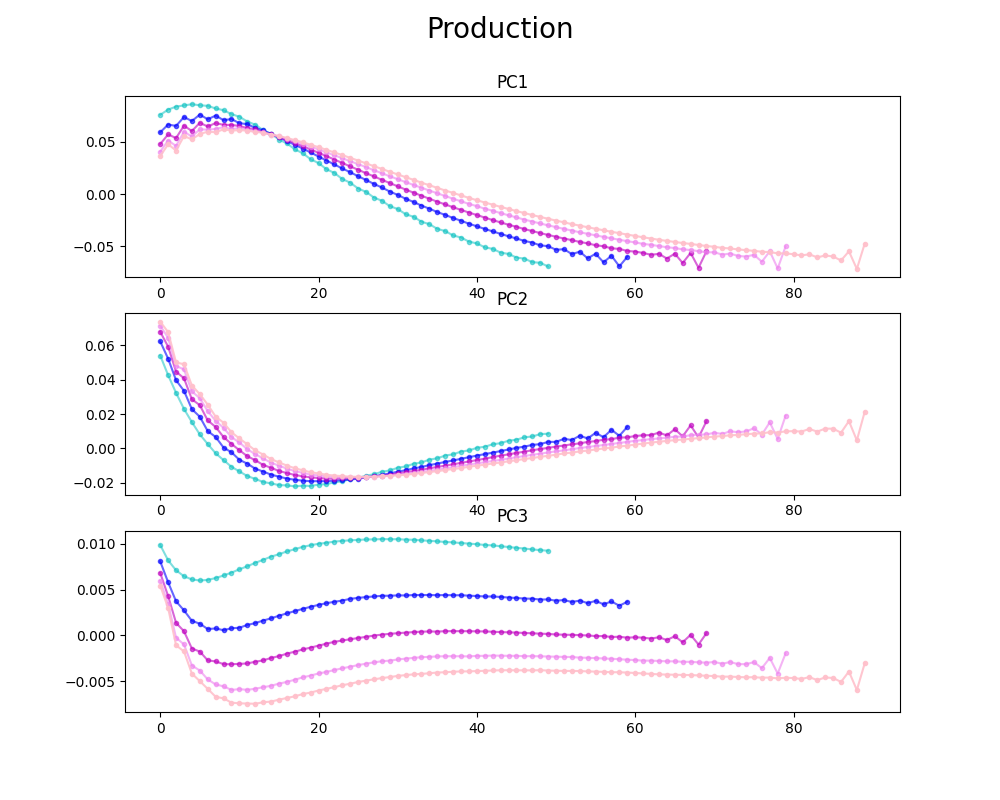

In [55]:
fig, ax = plt.subplots(3,1, figsize=(10,8))

plt.suptitle('Production',fontsize=20)

ax[0].plot(pca_p1[:,0], 'c', alpha=0.5, marker='.')
ax[0].plot(pca_p2[:,0],  'b', alpha=0.6, marker='.')
ax[0].plot(pca_p3[:,0], 'm', alpha=0.6, marker='.')
ax[0].plot(pca_p4[:,0], 'violet', alpha=0.6, marker='.')
ax[0].plot(pca_p5[:,0], 'pink', alpha=0.9, marker='.')
ax[0].set_title('PC1')

ax[1].plot(pca_p1[:,1], 'c', alpha=0.5, marker='.')
ax[1].plot(pca_p2[:,1],  'b', alpha=0.6, marker='.')
ax[1].plot(pca_p3[:,1], 'm', alpha=0.6, marker='.')
ax[1].plot(pca_p4[:,1], 'violet', alpha=0.6, marker='.')
ax[1].plot(pca_p5[:,1], 'pink', alpha=0.9, marker='.')
ax[1].set_title('PC2')

ax[2].plot(pca_p1[:,2], 'c', alpha=0.5, marker='.')
ax[2].plot(pca_p2[:,2],  'b', alpha=0.6, marker='.')
ax[2].plot(pca_p3[:,2], 'm', alpha=0.6, marker='.')
ax[2].plot(pca_p4[:,2], 'violet', alpha=0.6, marker='.')
ax[2].plot(pca_p5[:,2], 'pink', alpha=0.9, marker='.')
ax[2].set_title('PC3')

Stimulus: 400 , Production trial 5 (blue)): 490


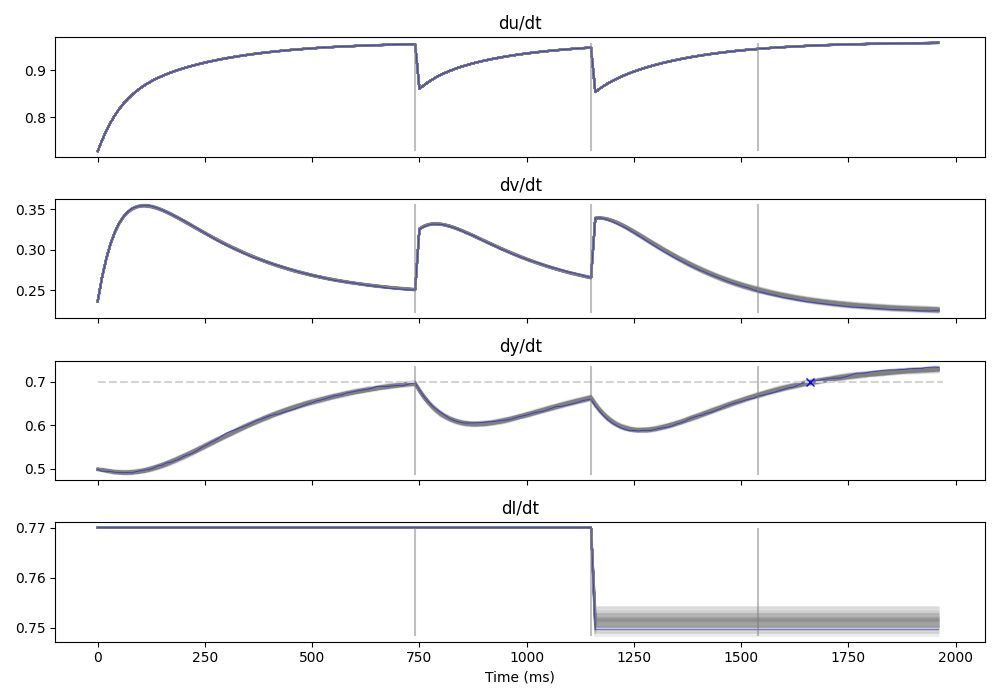

In [80]:
duration = 400
K = 5.0
initI = 0.77
task = otg.OneTwoGo_Task(PARAMS_DICT)
simulation, reset_lst, production = task.plot_trials(duration, 5, K, initI)

In [1]:
%matplotlib widget

import OneTwoGo as otg
import numpy as np
from scipy import signal
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [35]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 750, 
              'sigma': 0.01, 
             'ntrials':200,
              'delay': 500}

Stimulus: 500 , Production trial 5 (blue)): 640
timeouts = 0


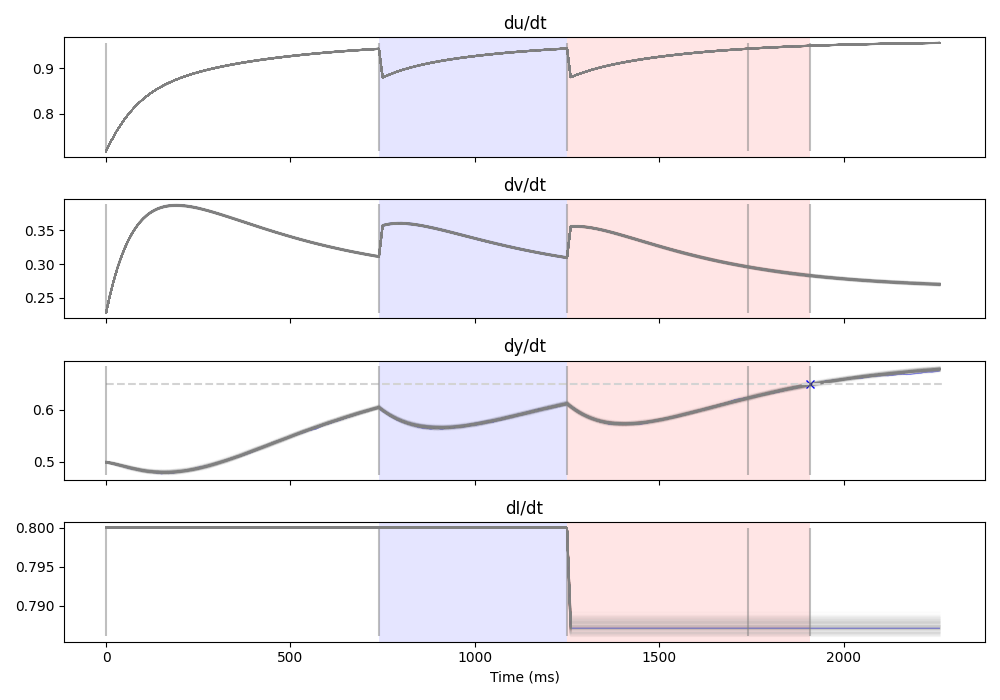

In [41]:
stim = 500
K = 5.0
initI = 0.8
PARAMS_DICT['tau'] = 150
task = otg.OneTwoGo_Task(PARAMS_DICT)
simu, res, production, timeout_trials = task.simulate_parallel(stim, K, initI)
task.plot_trials(simu, res, production, timeout_trials, stim, True)

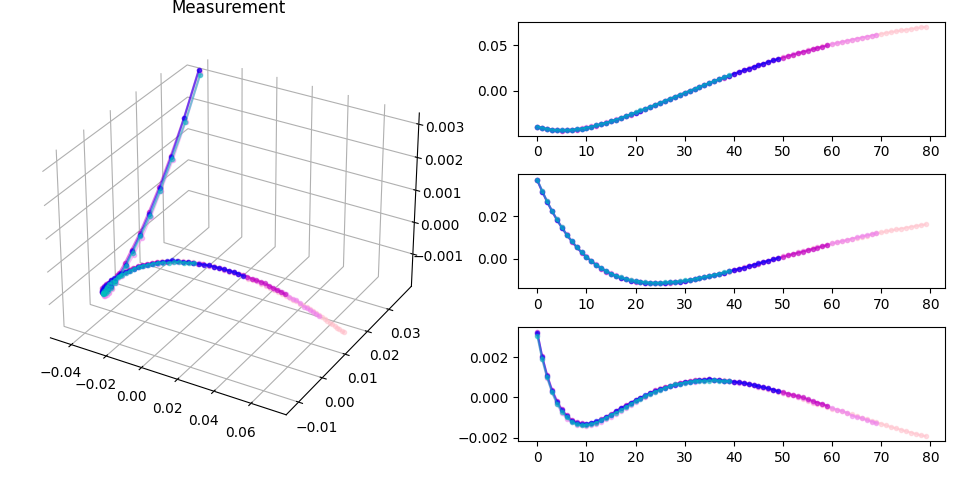

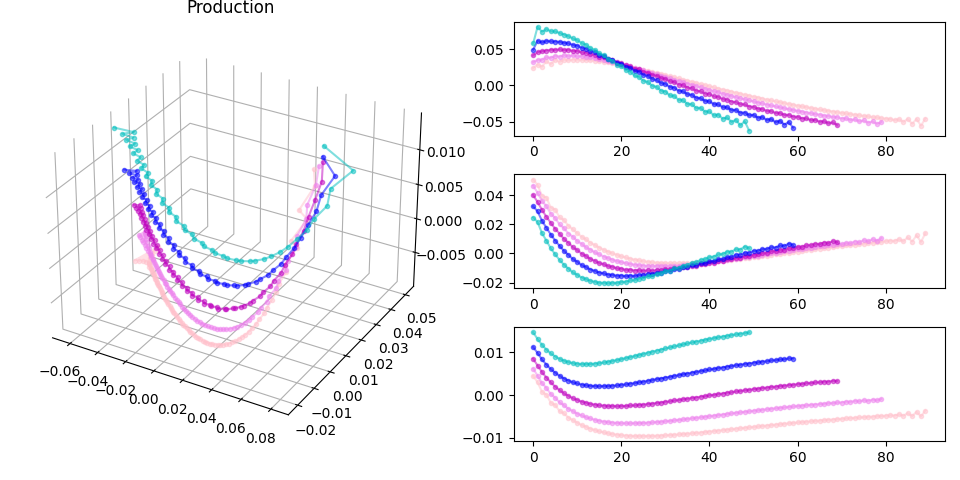

In [4]:
stimuli = [400, 500, 600, 700, 800]
c = ['c', 'b', 'm', 'violet', 'pink']
K = 5.0
initI = 0.77
PARAMS_DICT['tau'] = 150
task = otg.OneTwoGo_Task(PARAMS_DICT)
_,_ = task.plot_PCA(stimuli, K, initI, c, True)

1000
400
late timeout
800
400
timeouts = 1
[1]


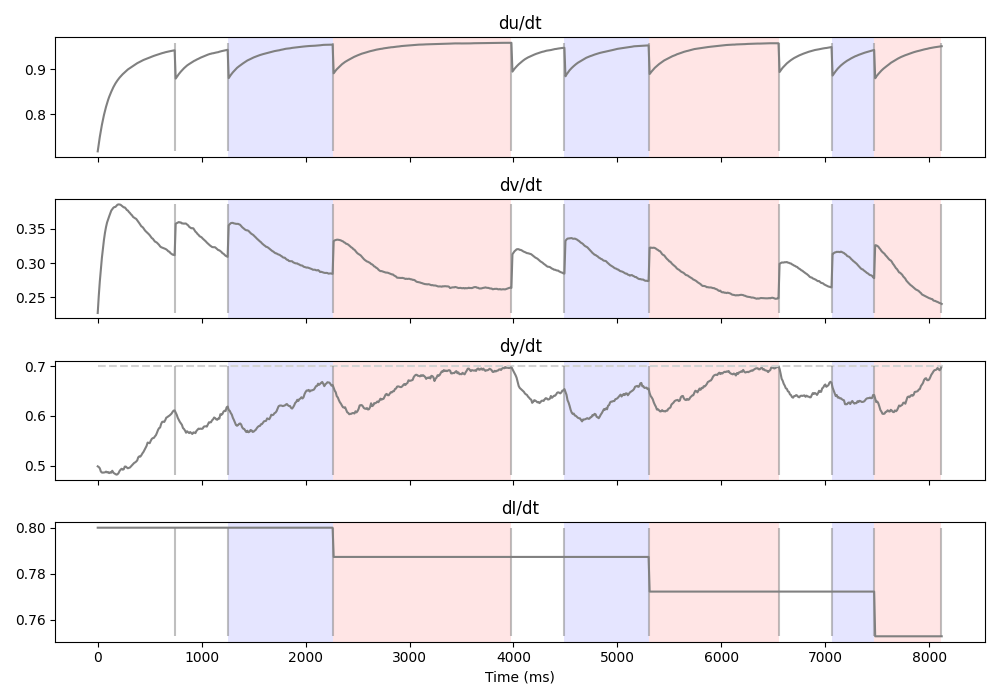

In [32]:
stimulus_lst = [1000,400, 800, 400]
K, initI = 5, 0.8
PARAMS_DICT['sigma'] = 0.035  
PARAMS_DICT['ntrials'] = 1

task = otg.OneTwoGo_Task(PARAMS_DICT)
simu, reset_lst, timeout_idx = task.simulate_experiment(stimulus_lst, K, initI)
task.plot_trials(simu, reset_lst, production, timeout_idx)
print(timeout_idx)

In [1]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

%load_ext autoreload
%autoreload 2

In [2]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
               'Iinit': 0.8,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 100,
              'delay': 500}

In [226]:
import matplotlib as mpl
from matplotlib import rc

jet = cm = plt.get_cmap('Spectral') #turbo_r
cNorm  = mpl.colors.Normalize(vmin=400, vmax=1000)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)
colors = []
for i in [400,450,500,550,600,650,700,750, 800, 850, 900, 950, 1000]:
    colors.append(scalarMap.to_rgba(i))

colors[6] = (255/255, 250/255, 141/255, 1.0)
    
colors_short = colors[:7]
colors_long = colors[6:]

In [3]:
stimulus_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

In [176]:
params = Params.from_dict({**PARAMS_DICT, 'ntrials': 50, 'tau': 120, 'th':0.8, 'delay':700, 'sigma': 0.01})

expsim = ExperimentSimulation(params)
K = 14.0
exp_result = expsim.simulate(stimulus_short, K)

result = exp_result.create_simulation_plot_data()
reset_indices = result.reset_indices
simulation_y = result.simulation[:,2]
simulation_I = result.simulation[:,3]

In [251]:
m_start = reset_indices[1::3]
m_stop = reset_indices[2::3]

p_start = reset_indices[2::3]
p_stop = reset_indices[3::3]

frames = zip(m_start[1:], m_stop[1:], p_start[1:], p_stop[1:])

In [252]:
measurment_lst = []
production_lst = []
production_I = []

for m_s, m_st, p_s, p_st in frames:
    m_s, m_st, p_s, p_st = int(m_s/10), int(m_st/10), int(p_s/10), int(p_st/10)
    measurment_lst.append(simulation_y[m_s:m_st])
    production_lst.append(simulation_y[p_s:p_st])
    production_I.append(simulation_I[p_s:p_st])

In [253]:
meas_sorted = []
prod_sorted = []
I_sorted = []

for stim in [400,450,500,550,600,650,700]:
    meas_sorted.append(np.array(measurment_lst, dtype=object)[np.where(stimulus_short[1:]==stim)[0]])
    prod_sorted.append(np.array(production_lst, dtype=object)[np.where(stimulus_short[1:]==stim)[0]])
    I_sorted.append(np.array(production_I, dtype=object)[np.where(stimulus_short[1:]==stim)[0]])

In [ ]:
#long

In [260]:
expsim2 = ExperimentSimulation(params)
K = 14.0
exp_result2 = expsim2.simulate(stimulus_long, K)

result2 = exp_result2.create_simulation_plot_data()
reset_indices2 = result2.reset_indices
simulation_y2 = result2.simulation[:,2]
simulation_I2 = result2.simulation[:,3]

In [261]:
m_start2 = reset_indices2[1::3]
m_stop2 = reset_indices2[2::3]

p_start2 = reset_indices2[2::3]
p_stop2 = reset_indices2[3::3]

frames2 = zip(m_start2[1:], m_stop2[1:], p_start2[1:], p_stop2[1:])

In [262]:
measurment_lst2 = []
production_lst2 = []
production_I2 = []

for m_s, m_st, p_s, p_st in frames2:
    m_s, m_st, p_s, p_st = int(m_s/10), int(m_st/10), int(p_s/10), int(p_st/10)
    measurment_lst2.append(simulation_y2[m_s:m_st])
    production_lst2.append(simulation_y2[p_s:p_st])
    production_I2.append(simulation_I2[p_s:p_st])

In [263]:
meas_sorted2 = []
prod_sorted2 = []
I_sorted2 = []

for stim in [700,750, 800, 850, 900, 950, 1000]:
    meas_sorted2.append(np.array(measurment_lst2, dtype=object)[np.where(stimulus_long[1:]==stim)[0]])
    prod_sorted2.append(np.array(production_lst2, dtype=object)[np.where(stimulus_long[1:]==stim)[0]])
    I_sorted2.append(np.array(production_I2, dtype=object)[np.where(stimulus_long[1:]==stim)[0]])

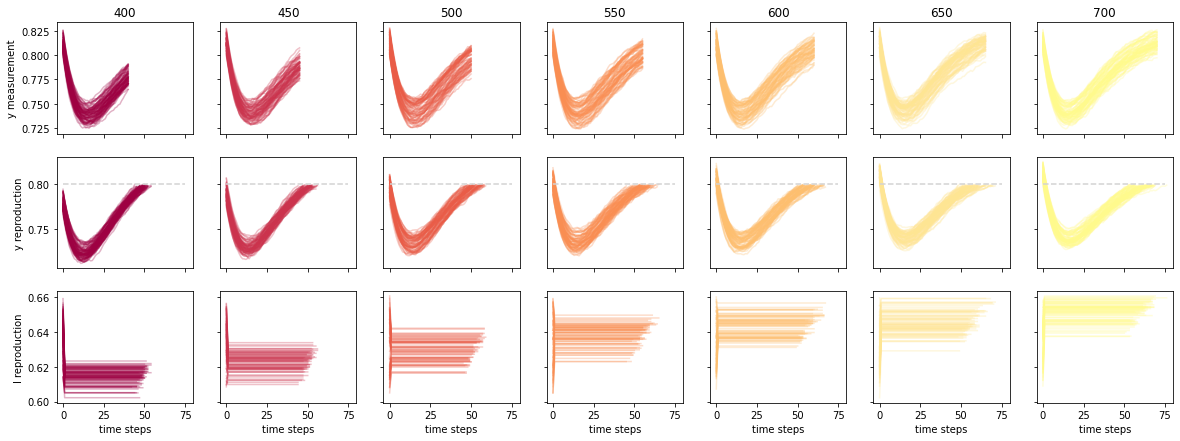

In [247]:
fig, ax = plt.subplots(3,7, sharex=True, sharey='row', figsize=(20,7))
ax.flatten()[0].set_ylabel('y measurement')
ax.flatten()[7].set_ylabel('y reproduction')
ax.flatten()[14].set_ylabel('I reproduction')

stimulus_range = [400,450,500,550,600,650,700]

for j, (c, stim, lst) in enumerate(zip(colors_short, stimulus_range,  meas_sorted)):
    ax.flatten()[j].set_title(str(stim))
    for i in lst:
        ax.flatten()[j].plot(i, alpha=0.3, color=c)

for j, (c, lst) in enumerate(zip(colors_short, prod_sorted)):
    for i in lst:
        ax.flatten()[j+7].plot(i, alpha=0.3, color=c)
    ax.flatten()[j+7].hlines(0.8, 0, 75, linestyle='--', color='lightgray')

    
for j, (c, lst) in enumerate(zip(colors_short, I_sorted)):
    for i in lst:
        ax.flatten()[j+14].plot(i, alpha=0.3, color=c)
    ax.flatten()[j+14].set_xlabel('time steps')

plt.show()

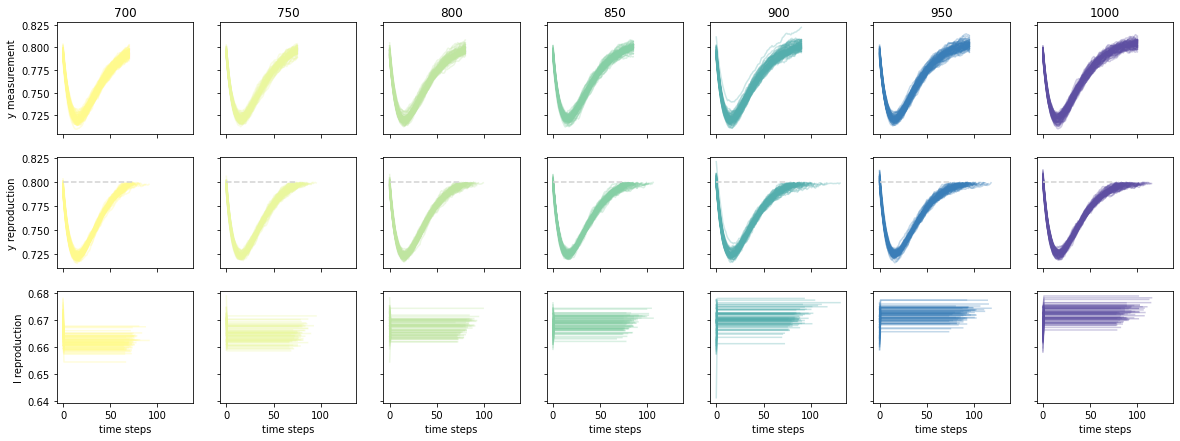

In [264]:
fig, ax = plt.subplots(3,7, sharex=True, sharey='row', figsize=(20,7))
ax.flatten()[0].set_ylabel('y measurement')
ax.flatten()[7].set_ylabel('y reproduction')
ax.flatten()[14].set_ylabel('I reproduction')

stimulus_range = [700,750, 800, 850, 900, 950,1000]

for j, (c, stim, lst) in enumerate(zip(colors_long, stimulus_range,  meas_sorted2)):
    ax.flatten()[j].set_title(str(stim))
    for i in lst:
        ax.flatten()[j].plot(i, alpha=0.3, color=c)

for j, (c, lst) in enumerate(zip(colors_long, prod_sorted2)):
    for i in lst:
        ax.flatten()[j+7].plot(i, alpha=0.3, color=c)
    ax.flatten()[j+7].hlines(0.8, 0, 75, linestyle='--', color='lightgray')

    
for j, (c, lst) in enumerate(zip(colors_long, I_sorted2)):
    for i in lst:
        ax.flatten()[j+14].plot(i, alpha=0.3, color=c)
    ax.flatten()[j+14].set_xlabel('time steps')

plt.show()

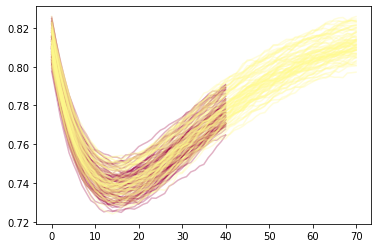

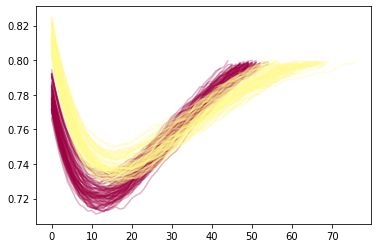

In [231]:
for i in meas_sorted[0]:
    plt.plot(i, alpha=0.3, color=colors_short[0])
for i in meas_sorted[6]:
    plt.plot(i, alpha=0.3, color=colors_short[-1])
plt.show()

for i in prod_sorted[0]:
    plt.plot(i, alpha=0.3, color=colors_short[0])
for i in prod_sorted[6]:
    plt.plot(i, alpha=0.3, color=colors_short[-1])
plt.show()

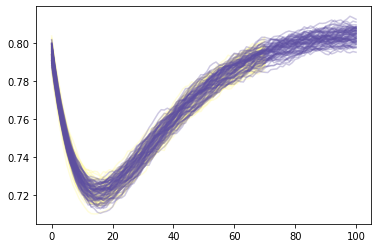

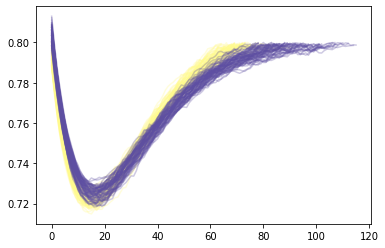

In [265]:
for i in meas_sorted2[0]:
    plt.plot(i, alpha=0.3, color=colors_long[0])
for i in meas_sorted2[6]:
    plt.plot(i, alpha=0.3, color=colors_long[-1])
plt.show()

for i in prod_sorted2[0]:
    plt.plot(i, alpha=0.3, color=colors_long[0])
for i in prod_sorted2[6]:
    plt.plot(i, alpha=0.3, color=colors_long[-1])
plt.show()